In [2]:
import numpy as np #linear algebra
import pandas as pd # a data processing and CSV I/O library

import warnings # current version of seaborn generates a bunch of warnings that will be ignore
warnings.filterwarnings('ignore')

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [3]:
# load Iris Flower dataset
iris = pd.read_csv('Iris.csv')

In [4]:
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
# SELECT COUNT(*), foo from bar  GROUP BY foo 
iris['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

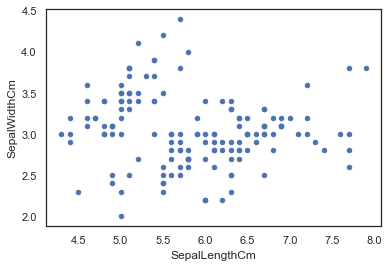

In [7]:
iris.plot(kind='scatter',x='SepalLengthCm', y='SepalWidthCm') # use this to make a scatterplot of the Iris features.

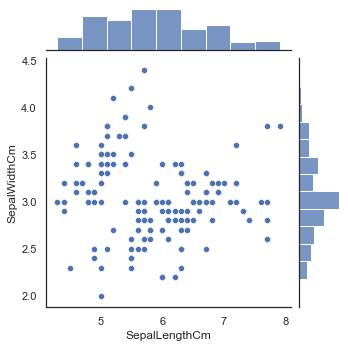

In [8]:
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x='SepalLengthCm',y='SepalWidthCm', data=iris, size=5)

In [9]:
iris.shape


(150, 6)

In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


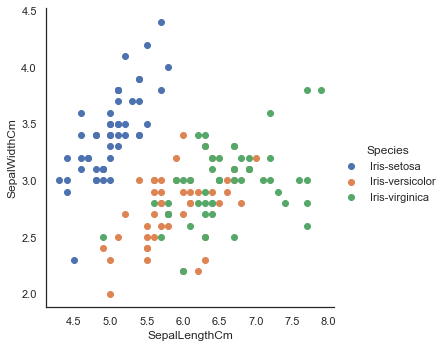

In [11]:
# use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue = 'Species', size=5) \
    .map(plt.scatter, 'SepalLengthCm','SepalWidthCm') \
    .add_legend()

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

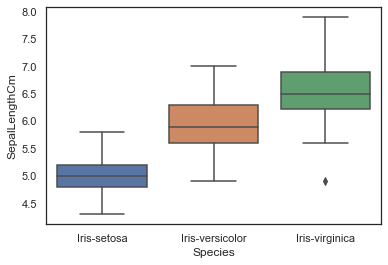

In [13]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x='Species', y='SepalLengthCm', data=iris)

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

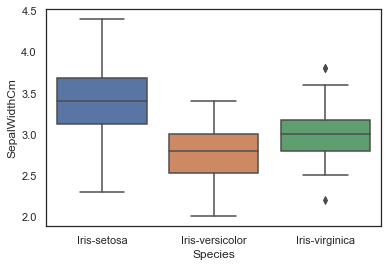

In [14]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x='Species', y='SepalWidthCm', data=iris)

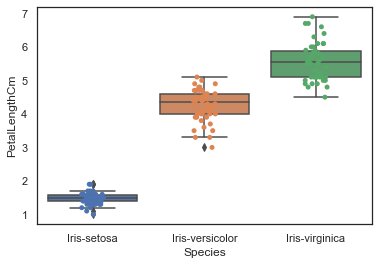

In [17]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(data=iris, x = 'Species',y = 'PetalLengthCm')
ax = sns.stripplot(data=iris, x='Species', y='PetalLengthCm', jitter=True)

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

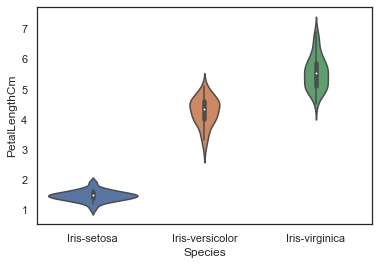

In [18]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x='Species',y='PetalLengthCm', data=iris, size=6)   

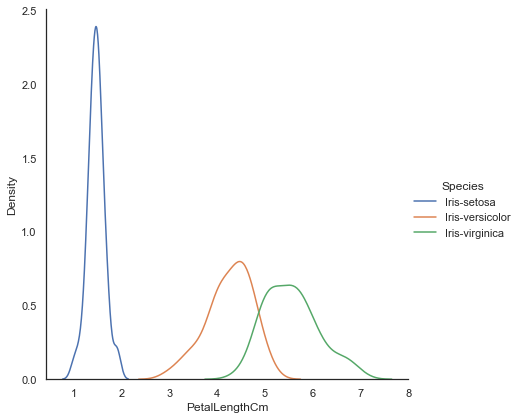

In [19]:
# A useful seaborn plot for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature

sns.FacetGrid(iris, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

In [20]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


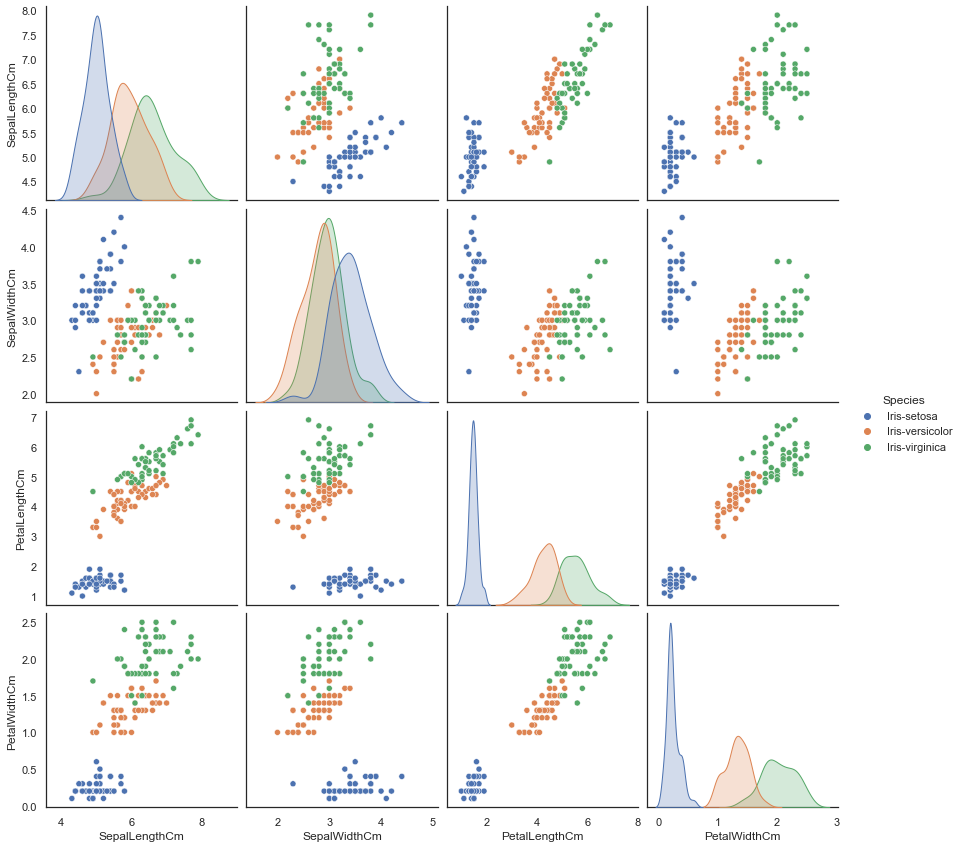

In [21]:
sns.pairplot(iris.drop('Id', axis=1), hue='Species', size=3)

Another useful seaborn plot is the pairplot, which shows the bivariate relation
between each pair of features

From the pairplot, we'll see that the Iris-setosa species is separataed from the other
two across all feature combinations

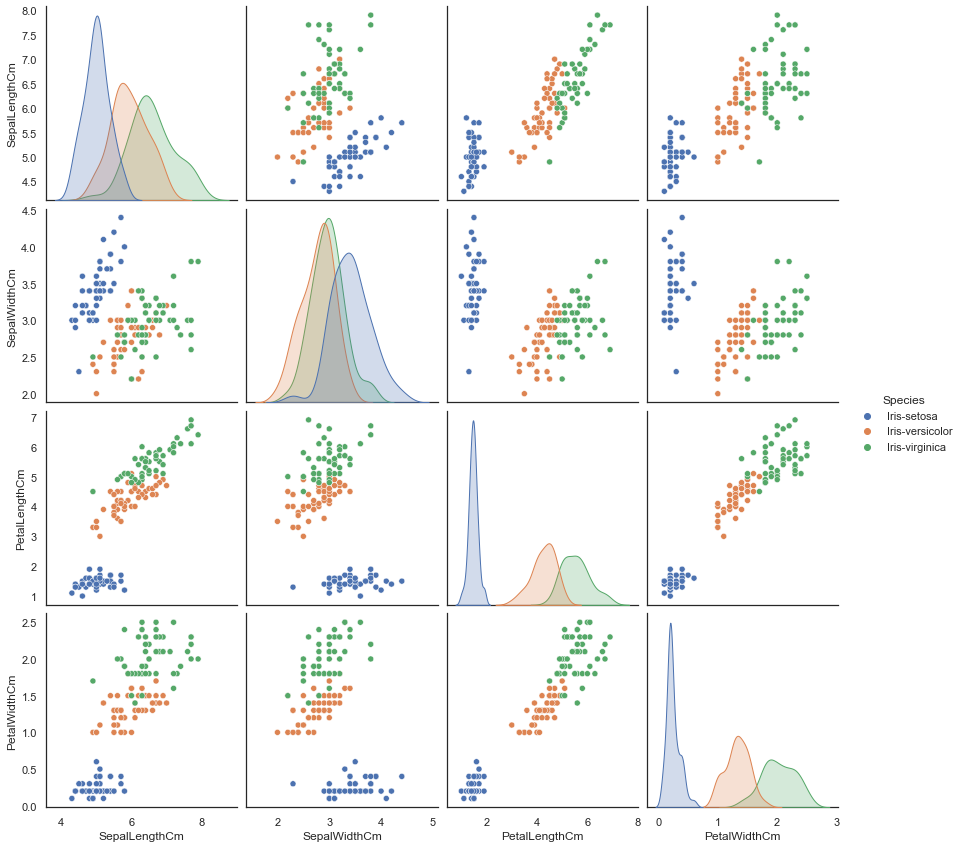

In [22]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde

sns.pairplot(iris.drop('Id', axis=1), hue='Species', size=3, diag_kind='kde')

array([[<AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

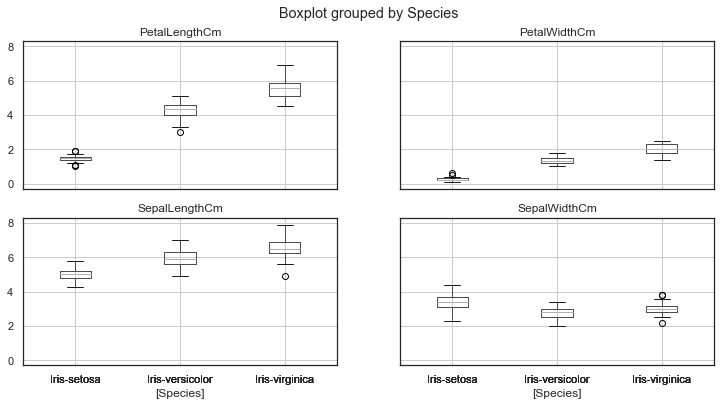

In [23]:
# make a boxplot with Pandas on each feature split out by species

iris.drop('Id', axis=1).boxplot(by='Species', figsize=(12,6))

<AxesSubplot:>

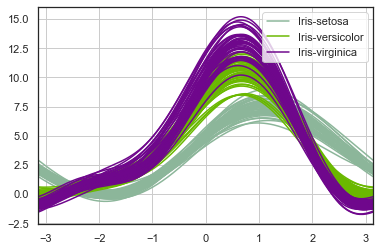

In [24]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species")

<AxesSubplot:>

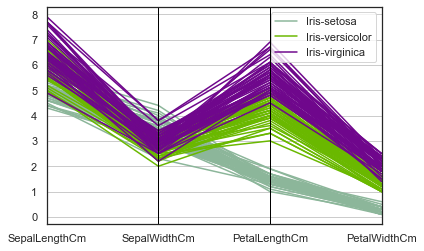

In [25]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis=1), "Species")

<AxesSubplot:>

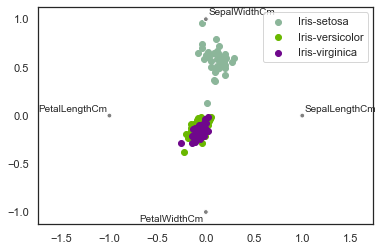

In [26]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.plotting import radviz
radviz(iris.drop("Id", axis=1), "Species")

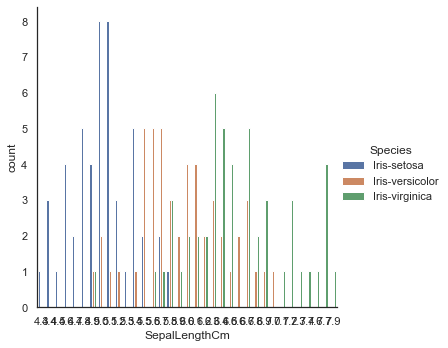

In [27]:
sns.factorplot('SepalLengthCm', data=iris, hue='Species', kind='count' )